In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
team = pd.read_excel('team_tokyo.xlsx')
team_df = pd.DataFrame(team)

In [3]:
columns_encode = ['medal']
ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), columns_encode)], remainder = 'passthrough')

encoded_df = pd.DataFrame(ct.fit_transform(team_df), columns = ct.get_feature_names_out())

In [4]:
new_column_names = ['bronze', 'gold', 'silver', 'nan', 'sport', 'event', 'athletes', 'rank', 
                    'country_name', 'country_code', 'value_unit', 'value_type']
encoded_df.columns = new_column_names

In [5]:
encoded_df = encoded_df.drop(columns = ['nan'], axis = 1)

In [6]:
def data_cast(df, column_name, data_type= int, placeholder=0):
    df[column_name] = df[column_name].fillna(placeholder)
    df[column_name] = df[column_name].astype(data_type)
    
    return df

data_cast(encoded_df, 'gold')
data_cast(encoded_df, 'silver')
data_cast(encoded_df, 'bronze')

,bronze,gold,silver,sport,event,athletes,rank,country_name,country_code,value_unit,value_type
0,0,1,0,Shooting,Trap Mixed Team,"[('Fatima GALVEZ', 'https://olympics.com/en/at...",1,Spain,ESP,NaN,NaN
1,0,0,1,Shooting,Trap Mixed Team,"[('Alessandra PERILLI', 'https://olympics.com/...",2,San Marino,SMR,NaN,NaN
2,1,0,0,Shooting,Trap Mixed Team,"[('Madelynn Ann BERNAU', 'https://olympics.com...",3,United States of America,USA,NaN,NaN
3,0,0,0,Shooting,Trap Mixed Team,"[('Zuzana STEFECEKOVA', 'https://olympics.com/...",4,Slovakia,SVK,NaN,NaN
4,0,0,0,Shooting,Trap Mixed Team,"[('Yukie NAKAYAMA', 'https://olympics.com/en/a...",5,Japan,JPN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1231,0,0,0,Beach Volleyball,Men,"[('Christopher MCHUGH', 'https://olympics.com/...",19,Australia,AUS,NaN,NaN
1232,0,0,0,Beach Volleyball,Men,"[('Ondrej PERUSIC', 'https://olympics.com/en/a...",19,Czech Republic,CZE,NaN,NaN
1233,0,0,0,Beach Volleyball,Men,"[('Enrico ROSSI', 'https://olympics.com/en/ath...",19,Italy,ITA,NaN,NaN
1234,0,0,0,Beach Volleyball,Men,"[('Yusuke ISHIJIMA', 'https://olympics.com/en/...",19,Japan,JPN,NaN,NaN


In [7]:
# Replace 'DNS' with NaN (if using pandas)
encoded_df['rank'] = pd.to_numeric(encoded_df['rank'], errors='coerce')

encoded_df.fillna(0)

print(encoded_df['rank'].unique())

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. nan]


In [8]:
def data_cast(df, column_name, data_type= int, placeholder=0):
    df[column_name] = df[column_name].fillna(placeholder)
    df[column_name] = df[column_name].astype(data_type)
    
    return df

data_cast(encoded_df, 'gold')
data_cast(encoded_df, 'silver')
data_cast(encoded_df, 'bronze')

,bronze,gold,silver,sport,event,athletes,rank,country_name,country_code,value_unit,value_type
0,0,1,0,Shooting,Trap Mixed Team,"[('Fatima GALVEZ', 'https://olympics.com/en/at...",1.0,Spain,ESP,NaN,NaN
1,0,0,1,Shooting,Trap Mixed Team,"[('Alessandra PERILLI', 'https://olympics.com/...",2.0,San Marino,SMR,NaN,NaN
2,1,0,0,Shooting,Trap Mixed Team,"[('Madelynn Ann BERNAU', 'https://olympics.com...",3.0,United States of America,USA,NaN,NaN
3,0,0,0,Shooting,Trap Mixed Team,"[('Zuzana STEFECEKOVA', 'https://olympics.com/...",4.0,Slovakia,SVK,NaN,NaN
4,0,0,0,Shooting,Trap Mixed Team,"[('Yukie NAKAYAMA', 'https://olympics.com/en/a...",5.0,Japan,JPN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1231,0,0,0,Beach Volleyball,Men,"[('Christopher MCHUGH', 'https://olympics.com/...",19.0,Australia,AUS,NaN,NaN
1232,0,0,0,Beach Volleyball,Men,"[('Ondrej PERUSIC', 'https://olympics.com/en/a...",19.0,Czech Republic,CZE,NaN,NaN
1233,0,0,0,Beach Volleyball,Men,"[('Enrico ROSSI', 'https://olympics.com/en/ath...",19.0,Italy,ITA,NaN,NaN
1234,0,0,0,Beach Volleyball,Men,"[('Yusuke ISHIJIMA', 'https://olympics.com/en/...",19.0,Japan,JPN,NaN,NaN


In [9]:
df_sorted = encoded_df.sort_values(by='country_name')
df_sorted

,bronze,gold,silver,sport,event,athletes,rank,country_name,country_code,value_unit,value_type
1115,0,0,0,Rowing,Lightweight Men's Double Sculls,"[('Kamel AIT DAOUD', 'https://olympics.com/en/...",17.0,Algeria,ALG,NaN,TIME
915,0,0,0,Sailing,470 Men,"[('Tyler Justus PAIGE', 'https://olympics.com/...",18.0,American Samoa,ASA,159,POINTS
264,0,0,0,Handball,Women,NaN,10.0,Angola,ANG,NaN,NaN
916,0,0,0,Sailing,470 Men,"[('Paixao AFONSO', 'https://olympics.com/en/at...",19.0,Angola,ANG,167,POINTS
1023,0,0,0,Rowing,Lightweight Women's Double Sculls,"[('Milka KRALJEV', 'https://olympics.com/en/at...",13.0,Argentina,ARG,NaN,TIME
...,...,...,...,...,...,...,...,...,...,...,...
367,0,0,0,Volleyball,Men,NaN,12.0,Venezuela,VEN,NaN,NaN
1113,0,0,0,Rowing,Lightweight Men's Double Sculls,"[('Cesar AMARIS FERNANDEZ', 'https://olympics....",15.0,Venezuela,VEN,NaN,TIME
730,0,0,0,Archery,Mixed Team,"[('Nguyet DO THI ANH', 'https://olympics.com/e...",23.0,Vietnam,VIE,NaN,NaN
1025,0,0,0,Rowing,Lightweight Women's Double Sculls,"[('Thi Thao LUONG', 'https://olympics.com/en/a...",15.0,Vietnam,VIE,NaN,TIME


In [10]:
encoded_df.isna().any()

bronze          False
gold            False
silver          False
sport           False
event           False
athletes         True
rank             True
country_name    False
country_code    False
value_unit       True
value_type       True
dtype: bool

In [15]:
df = encoded_df.copy()
df['gold'] = pd.to_numeric(df['gold'], errors='coerce')
df['silver'] = pd.to_numeric(df['silver'], errors='coerce')
df['bronze'] = pd.to_numeric(df['bronze'], errors='coerce')

# Group by 'country_name' and aggregate
grouped = df.groupby('country_name').agg({
    'sport': lambda x: x.nunique(),  # Count unique sports and sports with medals
    'gold': 'sum',
    'silver': 'sum',
    'bronze': 'sum'
}).reset_index()

grouped['Total Medals'] = grouped['gold'] + grouped['silver'] + grouped['bronze']

# Flatten the column names for easier access
grouped.columns = ['Country', 'Sports Participated', 'Gold', 'Silver', 'Bronze', 'Total Medals']
grouped

,Country,Sports Participated,Gold,Silver,Bronze,Total Medals
0,Algeria,1,0,0,0,0
1,American Samoa,1,0,0,0,0
2,Angola,2,0,0,0,0
3,Argentina,12,0,1,2,3
4,Australia,20,6,3,9,18
...,...,...,...,...,...,...
88,Uruguay,2,0,0,0,0
89,Uzbekistan,3,0,0,0,0
90,Venezuela,2,0,0,0,0
91,Vietnam,2,0,0,0,0


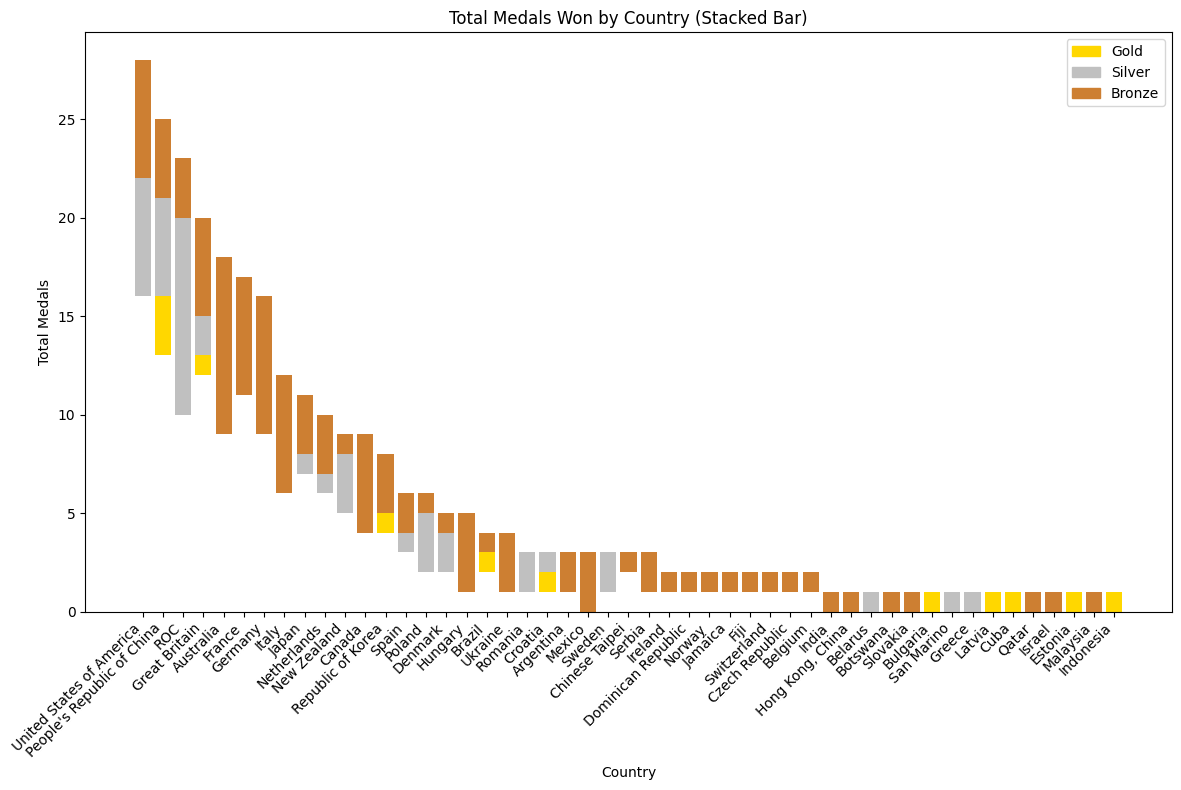

In [21]:
# Filter out countries with zero total medals
grouped = grouped[grouped['Total Medals'] > 0]

grouped = grouped[(grouped['Gold'] > 0) | (grouped['Silver'] > 0) | (grouped['Bronze'] > 0)]

# Sort by total medals in descending order
grouped = grouped.sort_values(by='Total Medals', ascending=False)

# Set up colors for each medal type
colors = ['#FFD700', '#C0C0C0', '#CD7F32']  # Gold, Silver, Bronze

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Plot bars for each country
for i, row in grouped.iterrows():
    country = row['Country']
    total_medals = row[['Gold', 'Silver', 'Bronze']].values.tolist()
    ax.bar(country, total_medals, bottom=grouped.loc[i, 'Total Medals'] - total_medals, color=colors)

# Add labels and title
ax.set_xlabel('Country')
ax.set_ylabel('Total Medals')
ax.set_title('Total Medals Won by Country (Stacked Bar)')

legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
ax.legend(legend_handles, ['Gold', 'Silver', 'Bronze'], loc='upper right')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()
